In [10]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from rbm import *

In [2]:
def lire_alpha_digit(data,arg):
    """Read digits from dataset

    Parameters
        Input data
            data: np.array 
        Argument of digits to be read
            arg: List[int]
    """
    n_pixels=data[0][0].shape[0]*data[0][0].shape[1]
    n_examples=data.shape[1]

    a=np.zeros((len(arg)*n_examples,n_pixels))
    for i in range(len(arg)):
        for j in range(n_examples):
            a[i*n_examples+j,:]=data[arg[i]][j].flatten()
    return a

In [3]:
def plot_data(data,nx,ny):
    """Plots the numbers in a grid of dimension (nx,ny)

    Parameters
        Input data
            data: np.array(n,320)
        Number of digits in nx dimension
            nx: int
        Number of digits in ny dimension
            ny: int
    """
    plt.figure(figsize=(ny,nx)) ## Create figure
    for i in range(nx*ny):
        plt.subplot(nx,ny,i+1)
        plt.imshow(np.reshape(data[i],(20,16)))
        plt.xticks([], [])
        plt.yticks([], [])
    plt.show()

In [4]:
def plot_data_out(data,nx,ny):
    """Plots the numbers in a grid of dimension (nx,ny)

    Parameters
        Input data
            data: np.array(n,20,16)
        Number of digits in nx dimension
            nx: int
        Number of digits in ny dimension
            ny: int
    """
    plt.figure(figsize=(ny,nx)) ## Create figure
    for i in range(nx*ny):
        plt.subplot(nx,ny,i+1)
        plt.imshow(data[i])
        plt.xticks([], [])
        plt.yticks([], [])
    plt.show()

In [6]:
#Load AlphaDigits dataset
data_s = sp.io.loadmat('binaryalphadigs.mat')['dat']

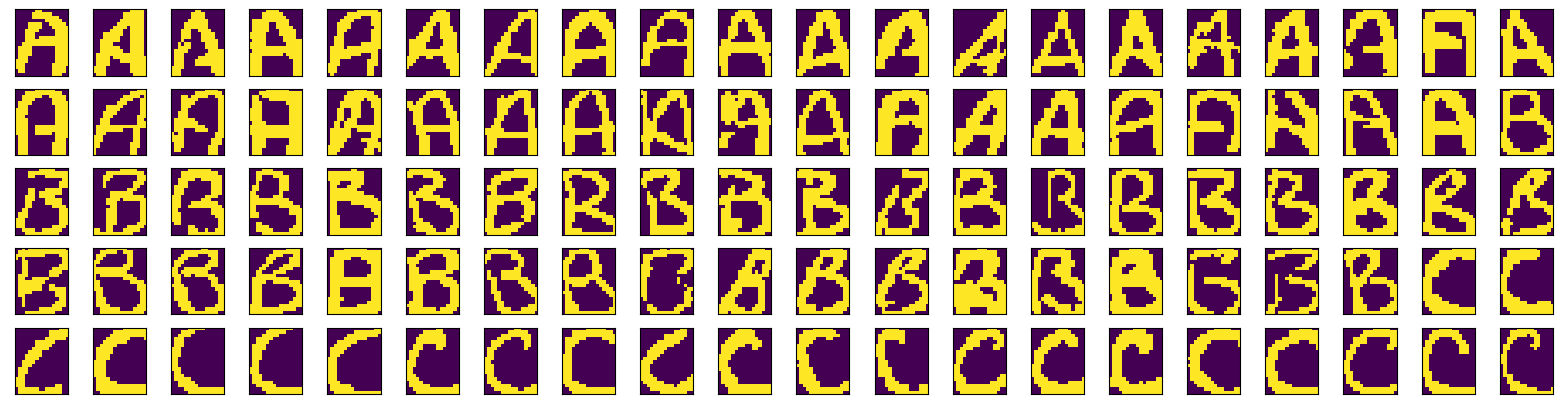

In [7]:
#Select training data from dataset and visualize
arg=[10,11,12]
data = lire_alpha_digit(data_s,arg)
plot_data(data,5,20)

In [13]:
#Dimension of visible variables (Number of pixels)
p=320

#Dimension of hidden variables
q=50

#Define and train RBM
rbm=RBM(p,q)
rbm.train_RBM(data, eps=0.1, nb_epoch=100, taille_batch=4)

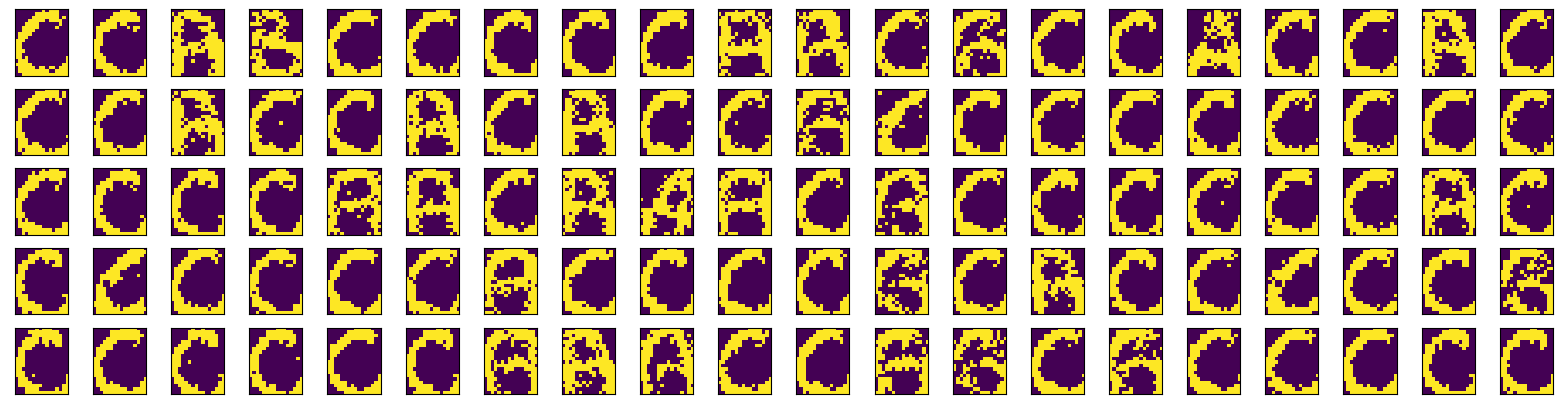

In [16]:
#Generate new data from RBM and visualize
data_gen=rbm.generer_image_RBM(100, nb_iter_gibbs=1000)
plot_data_out(data_gen,5,20)